# 사회적 거리두기 정책 시행 이 후  (의연님 코드 ctrl+c, ctrl+v )

*   항목 추가
*   항목 추가



###필요한 라이브러리 import 하기

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### warning message 무시

In [82]:
import warnings
warnings.filterwarnings(action='ignore')

### Covid-19 Data 불러오기

In [83]:
time = pd.read_csv("Time_2.csv")

### 데이터 처리 및 시각화 작업

### 'time' 데이터 확인 및 전처리

In [84]:
time_edit = time
time_edit
time_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       163 non-null    object
 1   time       163 non-null    int64 
 2   test       163 non-null    int64 
 3   negative   163 non-null    int64 
 4   confirmed  163 non-null    int64 
 5   released   163 non-null    int64 
 6   deceased   163 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 9.0+ KB


In [85]:
# time_edit.head(3)

##'사회적 거리두기' 시행이 끝난 후 코로나 감염자 수 등 변화 추이

### 일별로 test, negative, confirmed, released, deceased 수 DataFrame 만들기

In [98]:
df_sdc_af = time_edit[107:163]
df_sdc_af

,date,time,test,negative,confirmed,released,deceased
107,2020-05-06,0,643095,624280,10806,9333,255
108,2020-05-07,0,649388,630149,10810,9419,256
109,2020-05-08,0,654863,635174,10822,9484,256
110,2020-05-09,0,660030,640037,10840,9568,256
111,2020-05-10,0,663886,642884,10874,9610,256
112,2020-05-11,0,668492,646661,10909,9632,256
113,2020-05-12,0,680890,653624,10936,9670,258
114,2020-05-13,0,695920,665379,10962,9695,259
115,2020-05-14,0,711484,679771,10991,9762,260
116,2020-05-15,0,726747,695854,11018,9821,260


In [100]:
df_sdc_af = df_sdc_af.reset_index(drop=True)
df_sdc_af.tail(10)

,date,time,test,negative,confirmed,released,deceased
46,2020-06-21,0,1176463,1143971,12421,10868,280
47,2020-06-22,0,1182066,1150225,12438,10881,280
48,2020-06-23,0,1196012,1161250,12484,10908,281
49,2020-06-24,0,1208597,1175817,12535,10930,281
50,2020-06-25,0,1220478,1189015,12563,10974,282
51,2020-06-26,0,1232315,1200885,12602,11172,282
52,2020-06-27,0,1243780,1211261,12653,11317,282
53,2020-06-28,0,1251695,1219975,12715,11364,282
54,2020-06-29,0,1259954,1228698,12757,11429,282
55,2020-06-30,0,1273766,1240157,12800,11537,282


In [101]:
# 사회적 거리두기 이 후 5월 06일부터 5월 31까지의 데이터

for i in range(55,0,-1): #row 행 (날짜별 인덱스 번호임!! 위에 데이터프레임 확인해볼 것!!!)
    for ii in range(2,7): #column 열 (2 = test, 3 = negative, 4 = confirmed, 5 = released, 6 = deceased)
        df_sdc_af.iloc[i,ii] = df_sdc_af.iloc[i, ii] - df_sdc_af.iloc[i-1, ii]
df_sdc_af

,date,time,test,negative,confirmed,released,deceased
0,2020-05-06,0,643095,624280,10806,9333,255
1,2020-05-07,0,6293,5869,4,86,1
2,2020-05-08,0,5475,5025,12,65,0
3,2020-05-09,0,5167,4863,18,84,0
4,2020-05-10,0,3856,2847,34,42,0
5,2020-05-11,0,4606,3777,35,22,0
6,2020-05-12,0,12398,6963,27,38,2
7,2020-05-13,0,15030,11755,26,25,1
8,2020-05-14,0,15564,14392,29,67,1
9,2020-05-15,0,15263,16083,27,59,0


In [102]:
df_sdc_af= df_sdc_af.drop(0) 
df_sdc_af.tail()

,date,time,test,negative,confirmed,released,deceased
51,2020-06-26,0,11837,11870,39,198,0
52,2020-06-27,0,11465,10376,51,145,0
53,2020-06-28,0,7915,8714,62,47,0
54,2020-06-29,0,8259,8723,42,65,0
55,2020-06-30,0,13812,11459,43,108,0


## SDC_After 사회적 거리두기 이전 기간의 그래프 그리기

In [90]:
# seaborn 사용을 위한 데이터프레임 재정비하기!!
# hue를 사용해서 3차원 그래프 만들기.

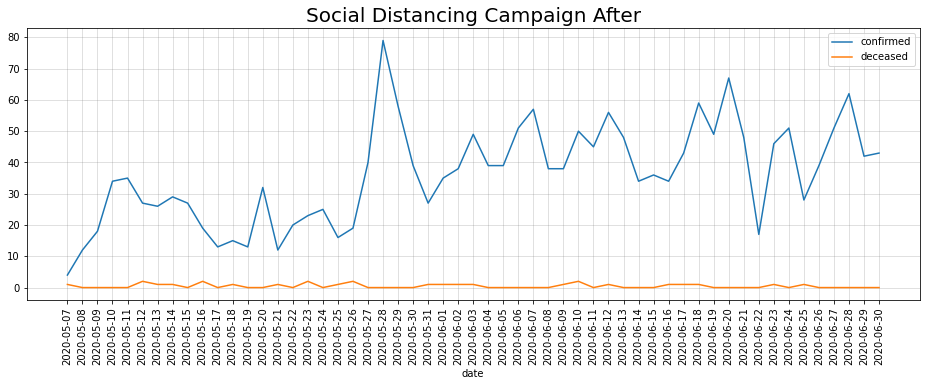

In [103]:
df_sdc_af[[ 'date','confirmed', 'deceased']].plot(x = 'date', figsize = (16, 5), fontsize = 10)
plt.title('Social Distancing Campaign After', fontsize = 20)
plt.xticks(np.arange(55), labels=df_sdc_af['date'], rotation=90) # 범위를 잘 맞춰 줘야 그래프가 정상적으로 나옴(인덱스 확인 잘할것)
plt.grid(alpha=0.3, color='grey')
plt.show()